## Agenda

[Cycles Notes](#Cycles-Notes)<br>

[0.0 Loading Data](#0.0-Loading-Data)<br>

[1.0 Decomposition](#1.0-Decomposition)<br>
&nbsp;[1.2 Monthly](#1.2-Monthly)<br>

[2.0 Stationarity](#2.0-Stationarity)<br>

[3.0 Autocorrelation](#3.0-Autocorrelation)<br>

[4.0 Partial Autocorrelation](#4.0-Partial-Autocorrelation)<br>

In [1]:
from notebook_utils.utils import *

import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [2]:
directory = Directory("1.2-pr-sales-prediction-time-series-analysis")

In [3]:
def fig(x, y):
    plt.rcParams['figure.figsize'] = (x, y)

## 0.0 Loading Data

In [4]:
data_frame_to_process = pd.read_pickle(os.path.join(os.path.join(directory.DATA_DIR, "sales_forecast_data"), "ml_data_to_preprocess.pkl"))
data_frame_to_process['revenue'] = data_frame_to_process['freight_value'] + data_frame_to_process['price']

In [5]:
df = data_frame_to_process.groupby([data_frame_to_process['order_purchase_timestamp'].dt.date])[['revenue']].sum()
df.index = pd.to_datetime(df.index)
df.head()

,revenue
order_purchase_timestamp,
2017-01-05,707.27
2017-01-06,988.28
2017-01-07,1447.99
2017-01-08,507.85
2017-01-09,774.51


## 1.0 Decomposition

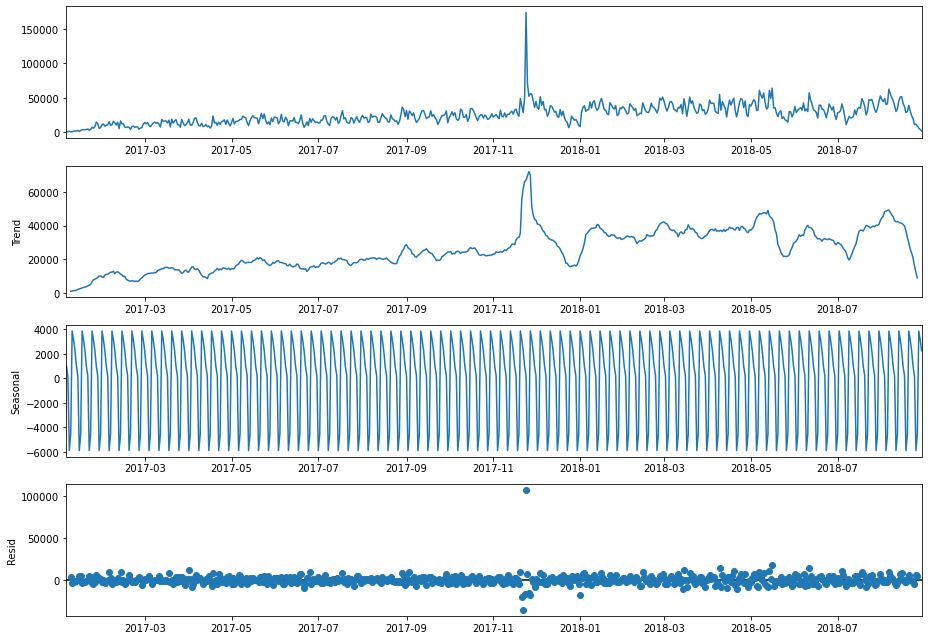

In [24]:
decomposition = seasonal_decompose(df)
decomposition.plot()
plt.show()

### 1.2 Monthly

No seasonality, but there is a trend. Non stationary series.

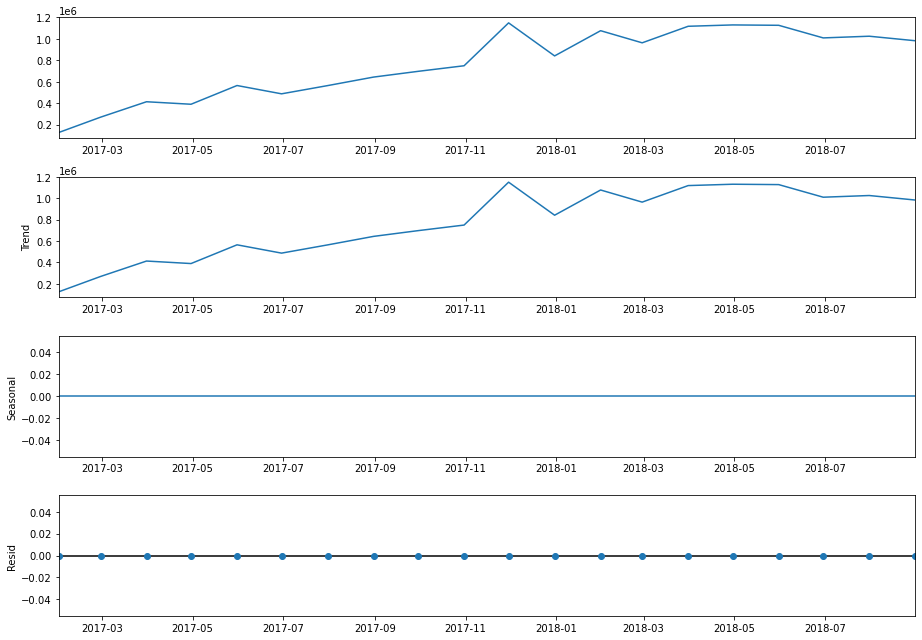

In [23]:
fig(13, 9)
decomposition = seasonal_decompose(df.resample('M').sum(), period=1)
decomposition.plot()
plt.show()

## 2.0 Stationarity

<a href="https://machinelearningmastery.com/time-series-data-stationary-python/" target="_blank"><strong>Stationary: p-value <= 0.05</strong></a>

- Day
- Week
- Month

In [51]:
result = adfuller(df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Stacionary:', (result[1] <= 0.05))
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.199085
p-value: 0.020038
Stacionary: True
Critical Values:
	1%: -3.442
	5%: -2.866
	10%: -2.569


In [52]:
result = adfuller(df.resample('W').sum())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Stacionary:', (result[1] <= 0.05))
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.955354
p-value: 0.306485
Stacionary: False
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586


In [50]:
result = adfuller(df.resample('M').sum())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Stacionary:', (result[1] <= 0.05))
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.270758
p-value: 0.181573
Stacionary: False
Critical Values:
	1%: -3.859
	5%: -3.042
	10%: -2.661


<AxesSubplot:xlabel='order_purchase_timestamp'>

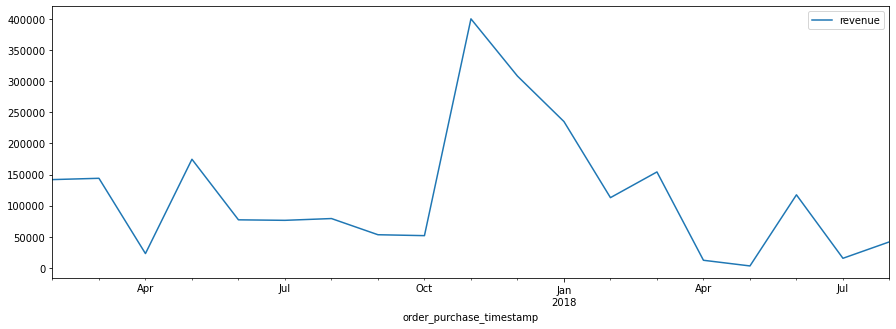

In [61]:
df.resample('M').sum().diff().dropna().abs().plot()

In [63]:
result = adfuller(df.resample('M').sum().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Stacionary:', (result[1] <= 0.05))
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.051010
p-value: 0.000000
Stacionary: True
Critical Values:
	1%: -3.859
	5%: -3.042
	10%: -2.661


## 3.0 Autocorrelation

<font color='grey'>moving average</font>

    We can use a lag of 2 when modeling a monthly time frame.

Autocorrelation for daily revenue with lag equals 1: 76.0%
Autocorrelation for daily revenue with lag equals 2: 65.0%
Autocorrelation for daily revenue with lag equals 3: 62.0%
Autocorrelation for daily revenue with lag equals 4: 61.0%
Autocorrelation for daily revenue with lag equals 5: 58.0%
Autocorrelation for daily revenue with lag equals 6: 61.0%
Autocorrelation for daily revenue with lag equals 7: 65.0%


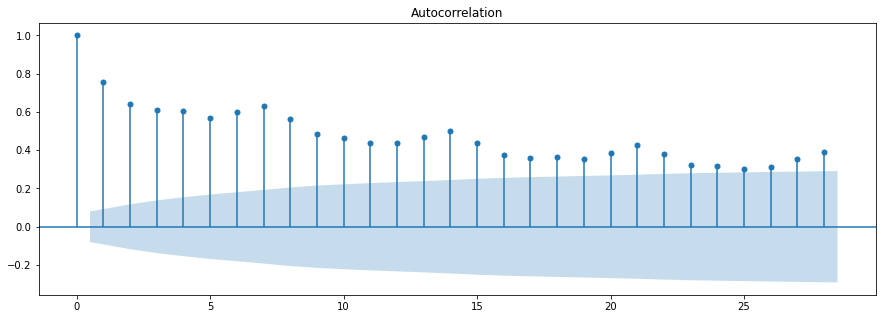

In [25]:
for lag in range(1, 8):
    autocorrelation = df['revenue'].autocorr(lag)
    print(f"Autocorrelation for daily revenue with lag equals {lag}: {np.round(autocorrelation*100)}%" )

fig(15, 5)
plot_acf(df['revenue'], alpha = 0.05);

Autocorrelation for weekly revenue with lag equals 1: 88.0%
Autocorrelation for weekly revenue with lag equals 2: 91.0%
Autocorrelation for weekly revenue with lag equals 3: 83.0%
Autocorrelation for weekly revenue with lag equals 4: 81.0%
Autocorrelation for weekly revenue with lag equals 5: 75.0%
Autocorrelation for weekly revenue with lag equals 6: 76.0%
Autocorrelation for weekly revenue with lag equals 7: 53.0%


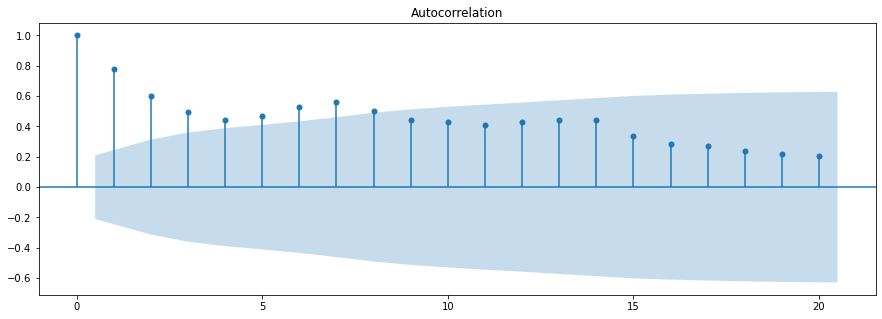

In [67]:
for lag in range(1, 8):
    autocorrelation = df['revenue'].resample("M").sum().autocorr(lag)
    print(f"Autocorrelation for weekly revenue with lag equals {lag}: {np.round(autocorrelation*100)}%" )

plot_acf(df['revenue'].resample('W').sum(), alpha = 0.05);

Autocorrelation for monthly revenue with lag equals 1: 88.0%
Autocorrelation for monthly revenue with lag equals 2: 91.0%
Autocorrelation for monthly revenue with lag equals 3: 83.0%
Autocorrelation for monthly revenue with lag equals 4: 81.0%
Autocorrelation for monthly revenue with lag equals 5: 75.0%
Autocorrelation for monthly revenue with lag equals 6: 76.0%
Autocorrelation for monthly revenue with lag equals 7: 53.0%


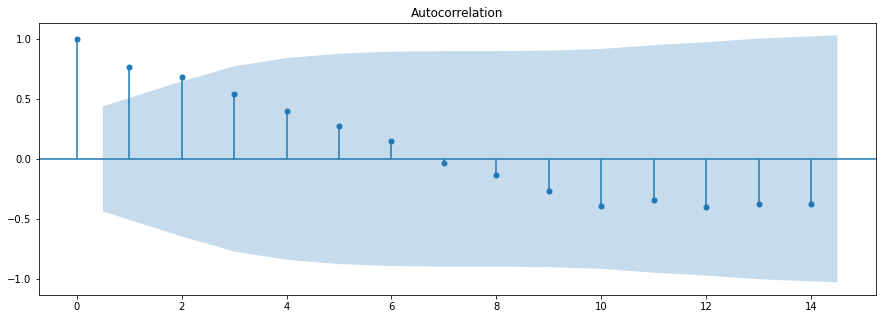

In [27]:
for lag in range(1, 8):
    autocorrelation = df['revenue'].resample("M").sum().autocorr(lag)
    print(f"Autocorrelation for monthly revenue with lag equals {lag}: {np.round(autocorrelation*100)}%" )

plot_acf(df['revenue'].resample('M').sum(), alpha = 0.05);

**diff**

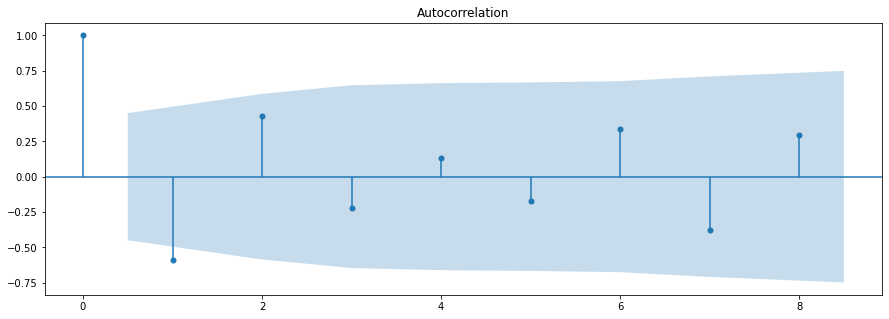

In [79]:
plot_acf(df['revenue'].resample('M').sum().diff().dropna(), lags=8, alpha = 0.05);

## 4.0 Partial Autocorrelation

<font color='grey'>AR - AutoRegressive</font>

- Day
- Week
- Month

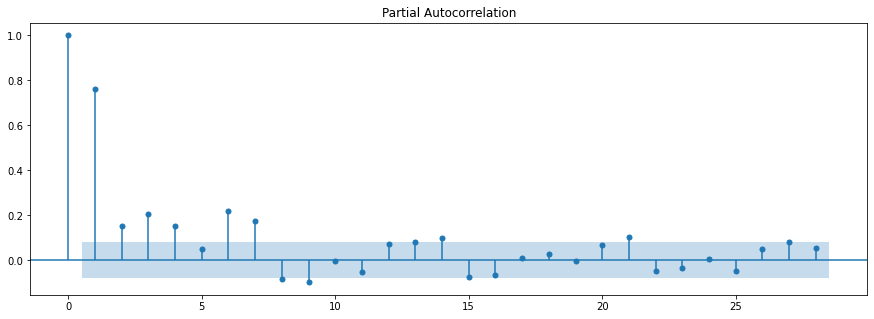

In [28]:
plot_pacf(df['revenue'], alpha = 0.05);

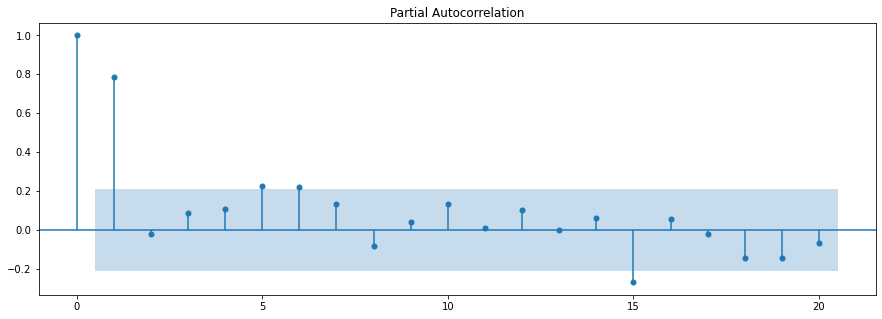

In [29]:
plot_pacf(df['revenue'].resample('W').sum(), alpha = 0.05);

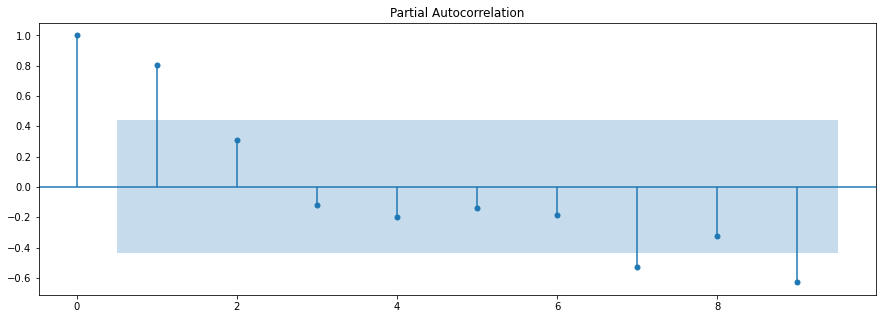

In [30]:
plot_pacf(df['revenue'].resample('M').sum(), lags=9 ,alpha = 0.05);

**diff**

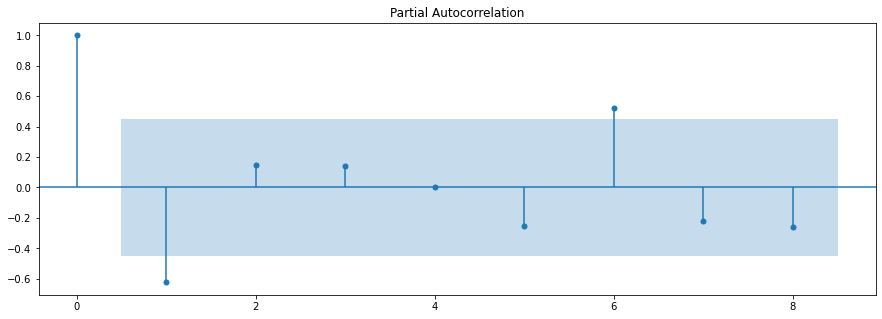

In [77]:
plot_pacf(df['revenue'].resample('M').sum().diff().dropna(), lags=8, alpha = 0.05);

In [73]:
df['revenue'].resample('M').sum().index # copy paste later

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31'],
              dtype='datetime64[ns]', name='order_purchase_timestamp', freq='M')